# SHAKEmapper Class Overview

The `SHAKEmapper` class is a comprehensive tool for creating and manipulating seismic shakemaps. Built using Matplotlib, Cartopy, and Rasterio, it allows you to overlay various seismic and geospatial data layers (e.g., VS30 data, rupture traces, seismic stations, epicenters, DYFI responses, and city markers) on a customizable basemap.

---
`last update: December, 2025`
`Version: 26.1`

## Key Features

- **Basemap Creation:**  
  Generate a customizable basemap with coastlines, borders, an ocean background, and gridlines.

- **VS30 Data Overlay:**  
  Display VS30 data with a discrete categorical colormap that highlights different seismic site conditions.

- **Data Extraction & Resampling:**  
  Extract VS30 data for a specified geographic extent and resample it to a target grid spacing.  
  Compute grid statistics such as minimum, maximum, mean, and standard deviation values.

- **Seismic Data Visualization:**  
  Overlay rupture traces, seismic station markers, earthquake epicenters, and DYFI response data on the map.

- **City Markers:**  
  Retrieve and display cities within the map extent from a CSV file, highlighting those above a specified population threshold.

- **Intensity Scale Generation:**  
  Automatically generate a color scale for seismic intensity measures (MMI, PGA, PGV, etc.) based on USGS standards.

## Usage Example

```python
# Create an instance of SHAKEmapper with a specified geographic extent.
mapper = SHAKEmapper(extent=[-125, -65, 25, 50])

# Generate the basemap.
fig, ax = mapper.create_basemap()

# Add VS30 layer from a specified grid file.
mapper.add_vs30_layer(vs30_filepath='path/to/global_vs30.grd')

# Add an earthquake epicenter (e.g., Los Angeles coordinates).
mapper.add_epicenter(lon=-118.2437, lat=34.0522)

# Optionally, overlay rupture traces, stations, DYFI responses, or cities.


# Creating a Map 

## Set up the data 

In [1]:
from modules.SHAKEparser import *
from modules.SHAKEmapper import *

xml_shakemap_file_path = f"./example_data/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_015_grid.xml"
raster_shakemap_file_path = f"./example_data/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_015_raster.zip"

file_path_rupturedata = f'./example_data/SHAKEfetch/usgs-rupture-versions/us7000pn9s/us7000pn9s_us_015_rupture.json'  # Replace with actual file path
file_path_instrument_data = f"./example_data/SHAKEfetch/usgs-instruments_data-versions/us7000pn9s/us7000pn9s_us_015_stationlist.json"
file_path_dyfixml = f'./example_data/SHAKEfetch/usgs-dyfi-versions/us7000pn9s/us7000pn9s_us_1_cdi_geo_1km.txt'


# Parse ShakeMap XML to DataFrame
shakemap_parser = USGSParser(parser_type="shakemap_xml", xml_file=xml_shakemap_file_path)

#Parse Rupture data 
rupture_parser = USGSParser(parser_type='rupture_json', mode='parse',rupture_json=file_path_rupturedata)
# Extract rupture coordinates from the parser.
x_coords, y_coords = rupture_parser.get_rupture_xy()

In [2]:
# Parse Instruments Data 
dyfi_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
dyfi_data_stationslist = dyfi_parser.get_dataframe(value_type='mmi')
dyfi_data_stationslist = dyfi_data_stationslist.dropna()
print(dyfi_data_stationslist.columns)

Index(['id', 'station_code', 'instrumentType', 'commType', 'station_name',
       'longitude', 'latitude', 'location', 'source', 'network',
       'station_type', 'nresp', 'vs30', 'intensity', 'intensity_flag',
       'intensity_stddev', 'elev', 'distance', 'rrup', 'repi', 'rhypo', 'rjb',
       'predictions', 'mmi_from_pgm', 'channel_number'],
      dtype='object')


In [3]:
# Parse did you feel it data 
dyfi_parser = USGSParser(parser_type='dyfi_data', file_path=file_path_dyfixml)
dyfi_data = dyfi_parser.get_dataframe()
dyfi_data

Auto-detected file type: 3


,Geocoded box,CDI,No. of responses,Hypocentral distance,Latitude,Longitude,Suspect?,Standard deviation,City,State
0,UTM:(43P 0785 1455 1000),2.2,1,2174,13.1525,77.6335,0,0.33,UTM:(43P 0785 1455 1000),NaN
1,UTM:(43Q 0439 1813 1000),3.8,1,2343,16.4021,74.4334,0,0.33,UTM:(43Q 0439 1813 1000),NaN
2,UTM:(43R 0715 3169 1000),2.0,1,2023,28.6347,77.2045,0,0.33,UTM:(43R 0715 3169 1000),NaN
3,UTM:(44N 0379 0742 1000),1.0,1,2417,6.7161,79.9097,0,0.33,UTM:(44N 0379 0742 1000),NaN
4,UTM:(44Q 0629 1850 1000),3.4,1,1553,16.7338,82.2148,0,0.33,UTM:(44Q 0629 1850 1000),NaN
...,...,...,...,...,...,...,...,...,...,...
1228,UTM:(50T 0449 4431 1000),1.0,1,2796,40.0322,116.4081,0,0.33,UTM:(50T 0449 4431 1000),NaN
1229,UTM:(51P 0289 1638 1000),2.0,1,2770,14.8125,121.0440,0,0.33,UTM:(51P 0289 1638 1000),NaN
1230,UTM:(51R 0238 3355 1000),1.0,1,2603,30.3030,120.2809,0,0.33,UTM:(51R 0238 3355 1000),NaN
1231,UTM:(51R 0339 2763 1000),2.0,1,2624,24.9785,121.4099,0,0.33,UTM:(51R 0339 2763 1000),NaN


In [4]:
#dyfi_data
# Parse Instruments Data 
instrument_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
instruments_data = instrument_parser.get_dataframe(value_type='pga')



## Create a map 

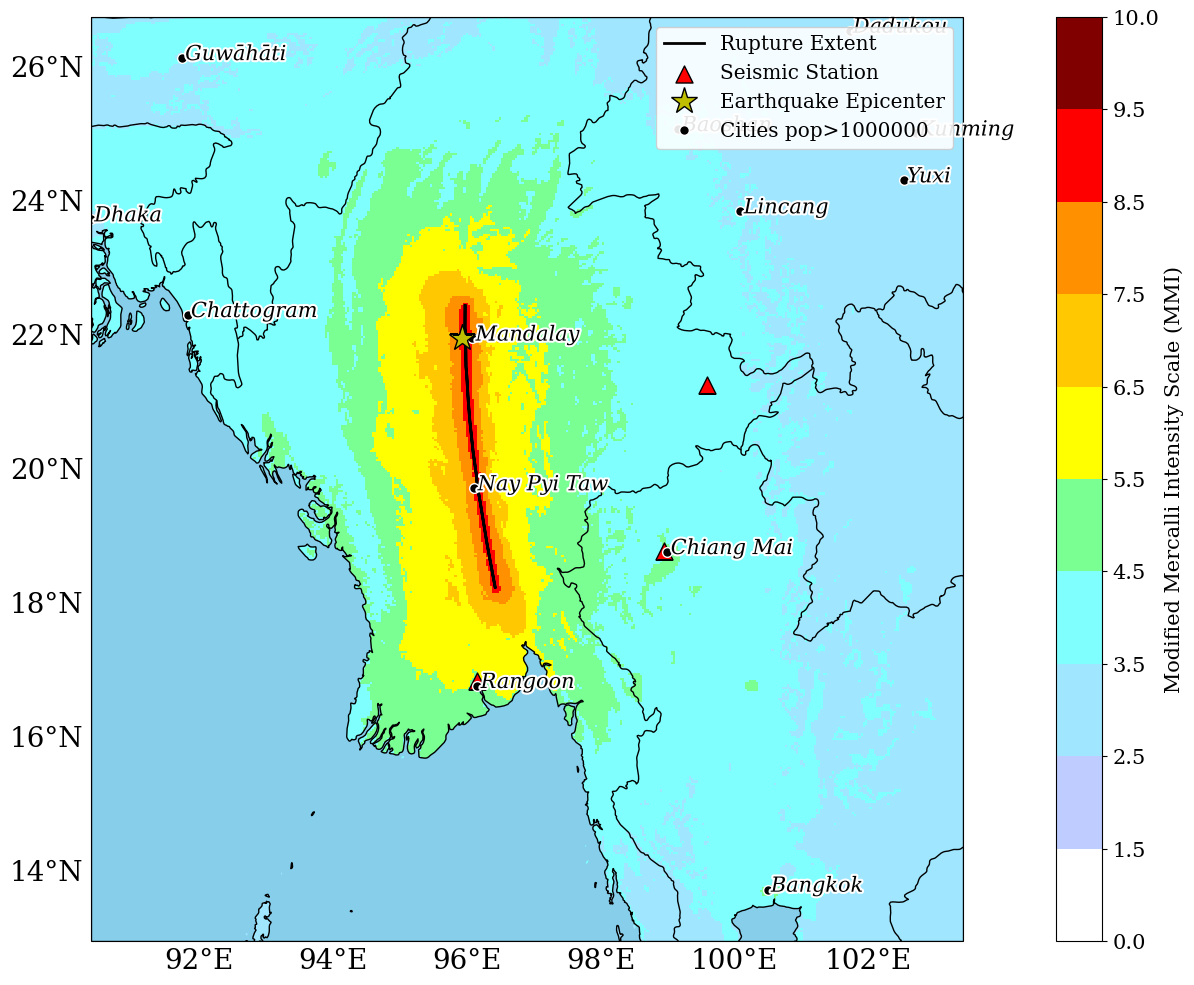

In [5]:
# Example usage:
if __name__ == "__main__":
    mapper = SHAKEmapper()
    mapper.set_extent([90.4, 103.4, 13.0, 26.8])
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')

    mapper.add_usgs_shakemap(shakemap_parser)

    mapper.add_rupture(x_coords, y_coords)
    
    mapper.add_stations(instruments_data['longitude'],instruments_data['latitude'])
    #
    mapper.add_epicenter(lon =95.926  , lat= 21.996)
    
    mapper.add_dyfi(dyfi_data_stationslist['latitude'],dyfi_data_stationslist['longitude'],dyfi_data_stationslist['intensity'])
    

    mapper.add_cities(population=1000000)
    
    mapper.update_legend(alpha=0.9)


    
    plt.show()

## Extracting a grid

In [6]:
mapper = SHAKEmapper()
shakemap_extent = shakemap_parser.get_extent()

print(shakemap_extent)
mapper.set_extent(shakemap_extent)


grid_data = mapper.extract_grid_data(target_spacing =1)


grid_data


[np.float64(90.4), np.float64(103.4), np.float64(13.0), np.float64(26.8)]


{'vs30': array([[313.65283, 308.79538, 292.54483, ..., 847.23785, 900.     ,
         837.1381 ],
        [313.20746, 317.39697, 283.47592, ..., 774.3794 , 748.06494,
         739.342  ],
        [328.5908 , 312.68307, 279.15396, ..., 900.     , 839.6283 ,
         585.63367],
        ...,
        [600.     , 600.     , 600.     , ..., 205.87846, 219.05585,
         224.98474],
        [600.     , 600.     , 600.     , ..., 221.08961, 219.2811 ,
         215.59807],
        [600.     , 600.     , 600.     , ..., 222.62274, 202.05782,
         203.9141 ]], shape=(1656, 1560), dtype=float32),
 'lon': array([ 90.4       ,  90.40833868,  90.41667736, ..., 103.38332264,
        103.39166132, 103.4       ], shape=(1560,)),
 'lat': array([26.8       , 26.79166163, 26.78332326, ..., 13.01667674,
        13.00833837, 13.        ], shape=(1656,)),
 'extent': [np.float64(90.39999999999998),
  np.float64(103.39999999999998),
  np.float64(12.999999999999998),
  np.float64(26.799999999999997)]}

In [7]:
mapper.get_grid_stats(target_spacing =1)



{'nrows': 1656,
 'ncols': 1560,
 'total_points': 2583360,
 'dx': np.float64(0.008333333333333333),
 'dy': np.float64(0.008333333333333333),
 'min': 180.0,
 'max': 900.0,
 'mean': 535.8164672851562,
 'std': 207.7152862548828,
 'extent': [np.float64(90.39999999999998),
  np.float64(103.39999999999998),
  np.float64(12.999999999999998),
  np.float64(26.799999999999997)]}

In [8]:
# Print doc string 
mapper.print_doc()




    SHAKEmapper: A Comprehensive Class for Shakemap Visualization and Data Extraction

    Overview
    --------
    The SHAKEmapper class provides a flexible and modular framework for creating, visualizing,
    and analyzing seismic shakemaps using Python. It leverages Matplotlib and Cartopy for geospatial
    plotting and Rasterio for reading raster (grid) files. This class supports:
      - Creation of a basemap with customizable geographic extent, coastlines, borders, ocean features,
        gridlines, and an outline frame.
      - Overlaying VS30 data from raster files with a discrete categorical color mapping.
      - Extraction of VS30 data from a specified geographic extent, with options for resampling
        (subsampling or upsampling) to a desired grid spacing.
      - Computation of basic grid statistics (number of rows/columns, grid spacing, min/max/mean/std of VS30).
      - Conversion of the VS30 grid data into a Pandas DataFrame for further analysis.
      - Overlay of